## This notebook makes Seaborn violin plots of rRNA annotations from different assemblers

#### Import all required modules

In [1]:
import pandas as pd
import os as os
import glob as glob
import numpy as np
import re as re

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Navigate to your working directory, which should contain both spreadsheets you want to merge

In [3]:
os.chdir("/Users/nastassia.patin/Desktop/Projects/Lasker 2019/PacBio/assembly-comparisons")

#### Upload data sheet

In [20]:
rrna = pd.read_csv("PacBio-rRNAs-v2.csv")

In [7]:
rrna['Assembly'].unique()

array(['metaFlye', 'hybridSPAdes', 'Illumina (SPAdes)',
       'Illumina (unassembled)'], dtype=object)

#### Subset specific metrics

In [8]:
rrna_prokka = rrna[(rrna['Annotation'] == "prokka")]
rrna_hmms = rrna[(rrna['Annotation'] == "hmms")]

#### Look at original

In [21]:
rrna.head()

,Sample,Sequencing,Assembly,Replicate,Annotation,Number of SSU genes
0,1903c111_10m-3,PacBio,metaFlye,3,hmms,0
1,1903c117_50m-3,PacBio,metaFlye,3,hmms,58
2,1903c118_23m-3,PacBio,metaFlye,3,hmms,0
3,1903c119_11m-3,PacBio,metaFlye,3,hmms,149
4,1903c122_28m-3,PacBio,metaFlye,3,hmms,0


In [22]:
df = rrna.reset_index()
df_melt = pd.melt(df, id_vars=['Sample','Sequencing','Assembly'], value_vars=['Number of SSU genes'])
df_melt.head()

,Sample,Sequencing,Assembly,variable,value
0,1903c111_10m-3,PacBio,metaFlye,Number of SSU genes,0
1,1903c117_50m-3,PacBio,metaFlye,Number of SSU genes,58
2,1903c118_23m-3,PacBio,metaFlye,Number of SSU genes,0
3,1903c119_11m-3,PacBio,metaFlye,Number of SSU genes,149
4,1903c122_28m-3,PacBio,metaFlye,Number of SSU genes,0


### Violin plots by metric with average values of each assembler plotted

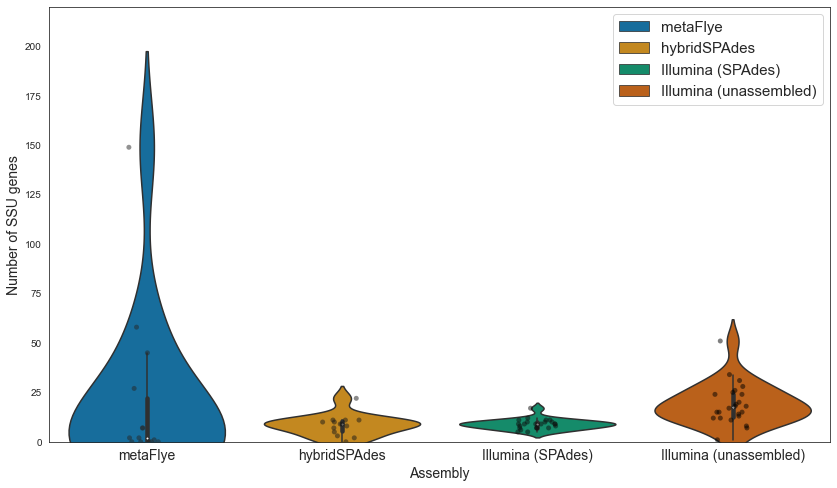

In [27]:
plt.figure(figsize=(14,8))
sns.set_style("white")
grped_vplot = sns.violinplot(data=df_melt, x="Assembly", y="value", hue="Assembly", 
              palette="colorblind", scale='width', dodge=False) # split=True, inner="quart", linewidth=1, 
grped_vplot = sns.stripplot(data=df_melt, x="Assembly", y="value", color="k", alpha=0.5, dodge=False, hue="Assembly")
#plt.title("SSU rRNA genes extracted from assemblies (HMMs) and unassembled Illumina reads (PhyloFlash)")
plt.ylabel("Number of SSU genes", size=14)
plt.xlabel("Assembly", size=14)
plt.xticks(size=14)
plt.ylim(0, 220)

# Let us first get legend information from the plot object
handles, labels = grped_vplot.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:4], labels[0:4], prop={'size': 15})

plt.savefig("SSUs_violin.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

### Anvi'o HMM annotations

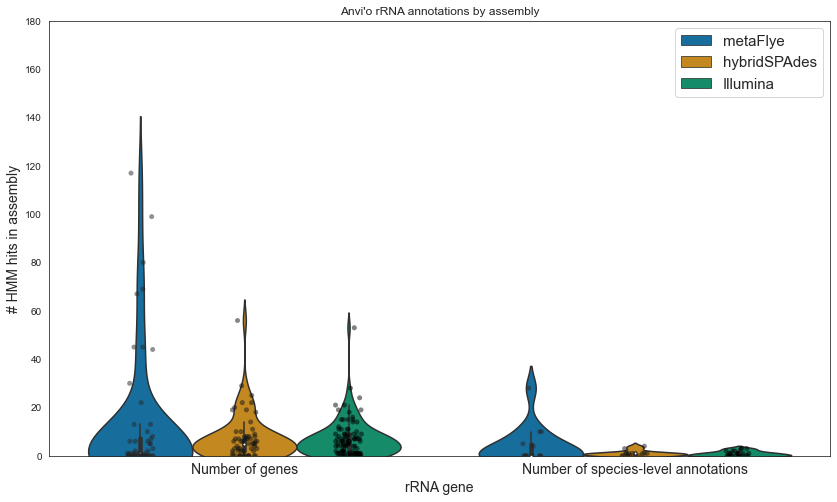

In [12]:
plt.figure(figsize=(14,8))
sns.set_style("white")
grped_vplot = sns.violinplot(data=rrna_hmms, x="rRNA gene", y="value", hue="Assembly", 
              palette="colorblind", scale='width') # split=True, inner="quart", linewidth=1, 
grped_vplot = sns.stripplot(data=df_melt, x="rRNA gene", y="value", color="k", alpha=0.5, dodge=True, hue="Assembly")
plt.title("Anvi'o rRNA annotations by assembly")
plt.ylabel("# HMM hits in assembly", size=14)
plt.xlabel("rRNA gene", size=14)
plt.xticks(size=14)
plt.ylim(0, 180)

# Let us first get legend information from the plot object
handles, labels = grped_vplot.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:3], labels[0:3], prop={'size': 15})

#plt.savefig("rRNA_HMMs_violin.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

### Compare minimum, average, and maximum sequence length of rRNA hits

In [13]:
rrna = pd.read_csv("PacBio-16S-rRNAs-hmms-metrics.csv")
rrna.head()

,Sample,rRNA gene,Sequencing,Assembly,Replicate,Annotation,num_hits_16S,num_hits_18S,num_hits_16S+18S,min_seq_len_16S,min_seq_len_18S,min_seq_len_16S+18S,avg_seq_len_16S,avg_seq_len_18S,avg_seq_len_16S+18S,max_seq_len_16S,max_seq_len_18S,max_seq_len_16S+18S
0,1903c111_10m-3,16S,PacBio,metaFlye,3,hmms,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.0,0
1,1903c117_50m-3,16S,PacBio,metaFlye,3,hmms,45.0,13.0,58,867.0,1294.0,867,1375.8,1729.2,1455.010345,1536.0,1804.0,1804
2,1903c118_23m-3,16S,PacBio,metaFlye,3,hmms,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.0,0
3,1903c119_11m-3,16S,PacBio,metaFlye,3,hmms,80.0,69.0,149,878.0,836.0,836,1398.6,1574.8,1480.195973,1646.0,1853.0,1853
4,1903c122_28m-3,16S,PacBio,metaFlye,3,hmms,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.000000,0.0,0.0,0


In [14]:
df = rrna.reset_index()
df_melt = pd.melt(df, id_vars=['Sample','Sequencing','Assembly'], value_vars=['min_seq_len_16S+18S', 
                                                                              'avg_seq_len_16S+18S', 'max_seq_len_16S+18S'])
df_melt.head()

,Sample,Sequencing,Assembly,variable,value
0,1903c111_10m-3,PacBio,metaFlye,min_seq_len_16S+18S,0.0
1,1903c117_50m-3,PacBio,metaFlye,min_seq_len_16S+18S,867.0
2,1903c118_23m-3,PacBio,metaFlye,min_seq_len_16S+18S,0.0
3,1903c119_11m-3,PacBio,metaFlye,min_seq_len_16S+18S,836.0
4,1903c122_28m-3,PacBio,metaFlye,min_seq_len_16S+18S,0.0


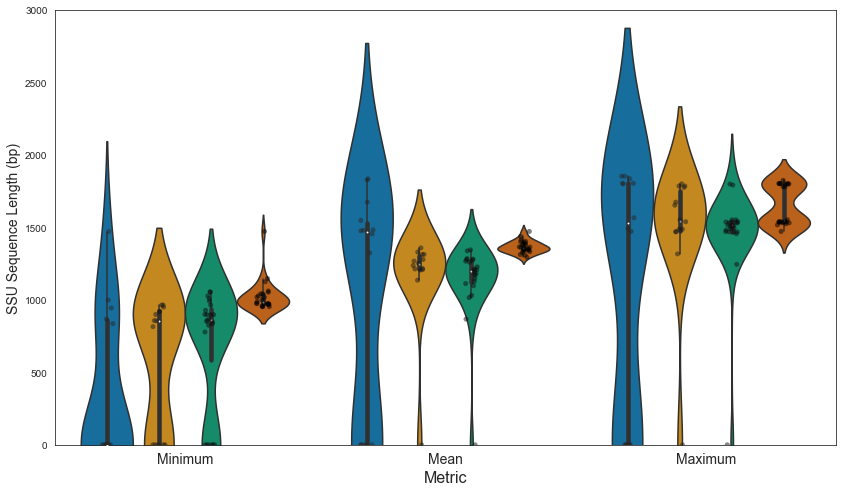

In [18]:
plt.figure(figsize=(14,8))
sns.set_style("white")
grped_vplot = sns.violinplot(data=df_melt, x="variable", y="value", hue="Assembly", 
              palette="colorblind", scale="width") # split=True, inner="quart", linewidth=1, 
grped_vplot = sns.stripplot(data=df_melt, x="variable", y="value", color="k", alpha=0.5, dodge=True, hue="Assembly")
#plt.title("SSU rRNA genes extracted from assemblies (HMMs) and unassembled Illumina reads (PhyloFlash)")
plt.ylabel("SSU Sequence Length (bp)", size=14)
plt.xlabel("Metric", size=16)
plt.xticks(np.arange(3), ['Minimum', 'Mean', 'Maximum'], size=14)
plt.ylim(0, 3000)

# Let us first get legend information from the plot object
handles, labels = grped_vplot.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:4], labels[0:4], prop={'size': 15})
plt.gca().get_legend().remove()

plt.savefig("SSU_rRNA_sizes_violin_nolegend.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()